In [1]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')
import os
import read_and_write as rw

## Manipulation d'image


### Informations sur l'image

In [85]:
folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp/'
image_filename = os.path.join(folder, 'google-earth-view-1756.tiff')

ds = rw.open_image(image_filename)
img = rw.load_img_as_array(image_filename)

In [84]:
img = np.load(image_filename, allow_pickle=True)

OSError: Failed to interpret file '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp/stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif' as a pickle

#### Dimensions

In [18]:
img.shape

(1200, 1800, 3)

#### Moyenne des bandes

In [94]:
img.mean(axis=(0,1))

array([125.35856296, 131.86713056, 106.75958472])

#### Ecart type de la bande bleu

In [95]:
img.std(axis=(0,1))[2]

55.067989937624276

In [79]:
img.dtype.type

numpy.uint8

### Manipulation de l'image

#### Production de l'image bleue

In [86]:
import matplotlib.pyplot as plt

In [87]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

In [89]:
img_irc = img.copy()
img_irc[:,:,2] = img [:,:,1]
img_irc[:,:,1] = img [:,:,2]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_irc)

In [74]:
out_irc = os.path.join(folder, 'blue_img.tif')
rw.write_image(out_irc, img_irc, data_set=ds)

#### Extraction du Pac Man

In [116]:
folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp/'
image_filename = os.path.join(folder, 'blue_img.tiff')

ds = rw.open_image(image_filename)
img = rw.load_img_as_array(image_filename)

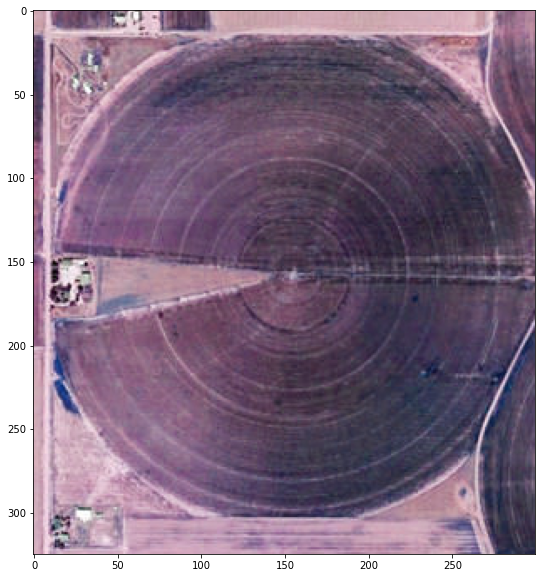

In [117]:
sub_img = img[175:500, 1450:1750,:]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(sub_img)

In [102]:
out_sub = os.path.join(folder, 'PacMan.tiff')
rw.write_image(out_sub, sub_img, data_set=ds)

#### Ajout d'un oeil noir

In [131]:
folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp/'
image_filename = os.path.join(folder, 'PacMan.tiff')

ds = rw.open_image(image_filename)
img = rw.load_img_as_array(image_filename)

In [132]:
img[70:90, 70:90, :] = 0

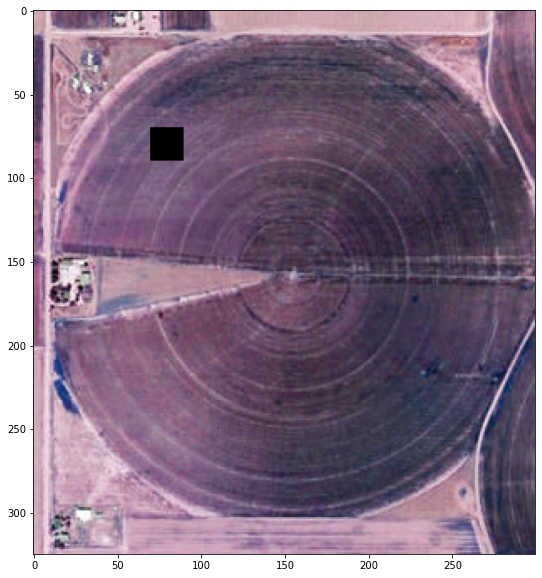

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

In [134]:
out_sub = os.path.join(folder, 'PacMan_oeil_noir.tiff')
rw.write_image(out_sub, img, data_set=ds)

#### Ajout d'un oeil jaune

In [127]:
folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp/'
image_filename = os.path.join(folder, 'PacMan.tiff')

ds = rw.open_image(image_filename)
img = rw.load_img_as_array(image_filename)

In [128]:
img[70:90, 70:90, :] = 0
img[70:90, 70:90, 1] = 255
img[70:90, 70:90, 0] = 255

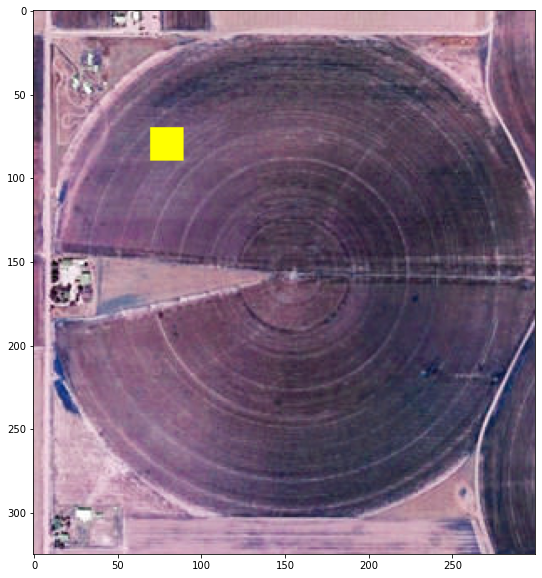

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)

In [130]:
out_sub = os.path.join(folder, 'PacMan_oeil_jaune.tiff')
rw.write_image(out_sub, img, data_set=ds)

## Classification

### Préparation des données

#### Série temp

In [12]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')
import os
import read_and_write as rw
import numpy as np

In [18]:
from ymraster import Raster, write_file

In [3]:
image_filename = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93.tif'

In [4]:
rst = Raster(image_filename)

In [5]:
rst.dtype.lstr_dtype

'uint16'

In [10]:
list_red = [2 + 10 * i for i in range(14)]
list_infrared = [6 + 10 * i for i in range(14)]
list_red
list_infrared

[6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136]

In [17]:
ndvi_serie = np.zeros((rst.height, rst.width, 14), dtype='uint16')
for i, (id_red, id_infrared) in enumerate(zip(list_red, list_infrared)):
    infrared = rst[:,:, id_infrared]
    red = rst[:,:, id_red]
    ndvi = (infrared - red)/(infrared + red)
    ndvi = ((ndvi + 1) * 1000).astype('uint16')
    ndvi_serie[:,:, i] = ndvi

<ipython-input-17-0bfe791d7cbd>:5: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (infrared - red)/(infrared + red)


In [19]:
out_filename = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi.tif'
write_file(out_filename, ndvi_serie, transform=rst.transform, srs=rst.srs)

#### Masque

In [54]:
import os


input_image = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi.tif'
output_image = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif'
emprise = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/masque_foret_2020.gpkg'
emprise_name = 'masque_foret'
command = 'gdalwarp -of GTiff -cutline {emprise} -cl {emprise_name} -crop_to_cutline -overwrite -dstnodata 0 {input_image} {output_image}'
command = command.format(emprise=emprise, emprise_name=emprise_name, input_image=input_image,
                         output_image=output_image)
print(command)
os.system(command)

gdalwarp -of GTiff -cutline /home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/masque_foret_2020.gpkg -cl masque_foret -crop_to_cutline -overwrite -dstnodata 0 /home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi.tif /home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif


0

#### Échantillons

In [14]:
import geopandas as gpd

In [15]:
sample = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/Reference_Terrain/ref_all_train_valid_31janv2018_L93.shp'
gdf = gpd.read_file(sample)
gdf

CODE   ESS_NV1                                            ESS_NV3  \
0      98_6_1  Feuillus         taillis simple Chene pubescent PB dominant   
1    100_26_1  Feuillus                 futaie Chene pubescent PB dominant   
2    102_97_1  Feuillus               Futaie de Chene sessiles PB dominant   
3    102_97_2  Feuillus               Futaie de Chene sessiles PB dominant   
4    103_82_1  Feuillus                                        PB dominant   
..        ...       ...                                                ...   
220      None      None                          Pin Maritime - vu de loin   
221      None      None  Futaie Pin Maritime en mélange avec Chene indigen   
222      None      None  Futaie Pin Maritime en mélange avec Chene indigen   
223      None      None                  Chene avec fragon et charme en SE   
224      None      None                  Chene avec fragon et charme en SE   

             ESS_NV2 CODE_ONF  SHAPE_LENG       ESS_NV2_2 Ess_dom Classe_Hau  \
0    Chene pubescent     None  887.278189  Chene indigene    None       None   
1    Chene pubescent     None  236.928284  Chene indigene    None       None   
2      Chene sessile     None  157.505587  Chene indigene    None       None   
3      Chene sessile     None   71.610324  Chene indigene    None       None   
4      Chene sessile     None  206.707126  Chene indigene    None       None   
..               ...      ...         ...             ...     ...        ...   
220     Pin maritime     None    0.000000            None    None       None   
221     Pin maritime     None    0.000000            None    None       None   
222     Pin maritime     None    0.000000            None    None       None   
223   Chene indigene     None    0.000000            None    None       None   
224   Chene indigene     None    0.000000            None    None       None   

    Sous_Etage   Rmq  Shape_Le_1    Shape_Area Verif_DS  Anne_terra  \
0         None  None  887.278189  46454.619500     None        2018   
1         None  None  236.928284   3868.178365     None        2018   
2         None  None  157.505587   1565.730030     None        2018   
3         None  None   71.610324    306.519813     None        2018   
4         None  None  206.707126   2463.489057     None        2018   
..         ...   ...         ...           ...      ...         ...   
220       None  None    0.000000      0.000000     None        2019   
221       None  None    0.000000      0.000000     None        2019   
222       None  None    0.000000      0.000000     None        2019   
223       None  None    0.000000      0.000000     None        2019   
224       None  None    0.000000      0.000000     None        2019   

                                              geometry  
0    POLYGON ((558949.178 6286753.373, 558888.853 6...  
1    POLYGON ((557254.447 6285074.705, 557220.051 6...  
2    POLYGON ((552100.868 6279793.191, 552100.445 6...  
3    POLYGON ((552090.144 6279678.282, 552087.392 6...  
4    POLYGON ((554175.593 6281694.471, 554167.065 6...  
..                                                 ...  
220  POLYGON ((555789.458 6287476.915, 555844.474 6...  
221  POLYGON ((551765.361 6277537.817, 551912.681 6...  
222  POLYGON ((551564.701 6277663.123, 551686.621 6...  
223  POLYGON ((556508.660 6284412.223, 556571.268 6...  
224  POLYGON ((556365.558 6284627.995, 556428.165 6...  

[225 rows x 16 columns]

In [16]:
df_class = gdf.groupby('ESS_NV2').count().loc[:,['geometry']]
df_class['num'] = list(range(1, len(df_class.index) + 1))
df_class

geometry  num
ESS_NV2                        
Cedre de l'Atlas         2    1
Chene Rouge              7    2
Chene indigene          13    3
Chene pubescent         35    4
Chene sessile          110    5
Eau                     11    6
Eucalyptus               5    7
Herbacee                 7    8
Pin laricio              5    9
Pin maritime            22   10
Pin sylvestre            4   11
Robinier                 1   12
Sol nu                   2   13

In [17]:
gdf.columns

Index(['CODE', 'ESS_NV1', 'ESS_NV3', 'ESS_NV2', 'CODE_ONF', 'SHAPE_LENG',
       'ESS_NV2_2', 'Ess_dom', 'Classe_Hau', 'Sous_Etage', 'Rmq', 'Shape_Le_1',
       'Shape_Area', 'Verif_DS', 'Anne_terra', 'geometry'],
      dtype='object')

In [18]:
to_drop = ['CODE', 'ESS_NV1', 'ESS_NV3', 'CODE_ONF', 'SHAPE_LENG',
       'ESS_NV2_2', 'Ess_dom', 'Classe_Hau', 'Sous_Etage', 'Rmq', 'Shape_Le_1',
       'Shape_Area', 'Verif_DS', 'Anne_terra']

In [19]:
new_dgf = gdf.drop(to_drop, axis=1)
new_dgf.columns

Index(['ESS_NV2', 'geometry'], dtype='object')

In [20]:
new_dgf.loc[:, 'ESS_NV2'] == 'Robinier' 

0      False
1      False
2      False
3      False
4      False
       ...  
220    False
221    False
222    False
223    False
224    False
Name: ESS_NV2, Length: 225, dtype: bool

In [21]:
for i, a_class in enumerate(df_class.index):
    cond = new_dgf.loc[:, 'ESS_NV2'] == a_class
    new_dgf.loc[cond, 'num'] = i +1

In [33]:
count = new_dgf.groupby(['ESS_NV2', 'num']).count()
count.columns = ['Effectif']
count

Effectif
ESS_NV2          num           
Cedre de l'Atlas 1.0          2
Chene Rouge      2.0          7
Chene indigene   3.0         13
Chene pubescent  4.0         35
Chene sessile    5.0        110
Eau              6.0         11
Eucalyptus       7.0          5
Herbacee         8.0          7
Pin laricio      9.0          5
Pin maritime     10.0        22
Pin sylvestre    11.0         4
Robinier         12.0         1
Sol nu           13.0         2

In [52]:
new_dgf.to_file('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/Reference_Terrain/sample_eval.shp')

#### Rasterization

In [55]:
# define parameters
in_vector = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/Reference_Terrain/sample_eval.shp'
ref_image = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif'
out_image = os.path.splitext(in_vector)[0] + '.tif'
field_name = 'num'  # field containing the numeric label of the classes

# define commande
cmd_pattern = ("otbcli_Rasterization -in {in_vector} -im {ref_image} -out {out_image}"
               " -mode attribute -mode.attribute.field {field_name}")
cmd = cmd_pattern.format(in_vector=in_vector, ref_image=ref_image,
                         out_image=out_image, field_name=field_name)

print(cmd)
os.system(cmd)

otbcli_Rasterization -in /home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/Reference_Terrain/sample_eval.shp -im /home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif -out /home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/Reference_Terrain/sample_eval.tif -mode attribute -mode.attribute.field num


0

### Lets classif

In [56]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')
import os
import read_and_write as rw
import numpy as np

In [20]:
image_filename = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93_ndvi.tif'

ds = rw.open_image(image_filename)
img = rw.load_img_as_array(image_filename)

#### Tous les échantillons

In [35]:
np.unique(Y)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

/home/terudel/anaconda3/envs/sigma-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/terudel/anaconda3/envs/sigma-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/terudel/anaconda3/envs/sigma-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

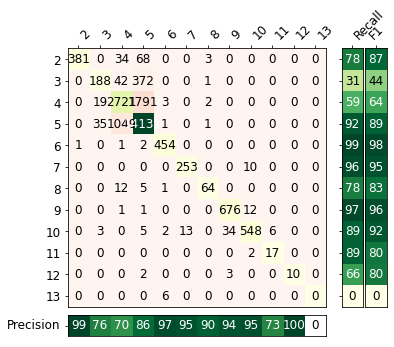

In [41]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')

import os
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, \
    accuracy_score

# personal librairies
import classification as cla
import read_and_write as rw
import plots

# 1 --- define parameters
# inputs
my_folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp'
sample_filename = os.path.join(my_folder, 'sample_eval.tif')
image_filename = os.path.join(my_folder, 'stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif')
# outputs
out_classif = os.path.join(my_folder, 'ma_classif.tif')
out_matrix = os.path.join(my_folder, 'ma_matrice.png')
out_qualite = os.path.join(my_folder, 'mes_qualites.png')

# 2 --- extract samples
X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)

# 3 --- Train
clf = tree.DecisionTreeClassifier(max_leaf_nodes=100)  ### Warning
clf.fit(X, Y)

# 4 --- Test 
Y_predict = clf.predict(X)

# compute quality
cm = confusion_matrix(Y, Y_predict)
report = classification_report(Y, Y_predict, labels=np.unique(Y),
                               output_dict=True)
accuracy = accuracy_score(Y, Y_predict)

# display and save quality
plots.plot_cm(cm, np.unique(Y), out_filename=out_matrix)
plots.plot_class_quality(report, accuracy, out_filename=out_qualite)

# 5 --- apply on the whole image
# load image
X_img, _, t_img = cla.get_samples_from_roi(image_filename, image_filename)

# predict image
Y_predict = clf.predict(X_img)

# reshape
ds = rw.open_image(image_filename)
nb_col, nb_row, _ = rw.get_image_dimension(ds)  ### Warning

img = np.zeros((nb_row, nb_col, 1), dtype='uint8')
img[t_img[0], t_img[1], 0] = Y_predict

# write image
ds = rw.open_image(image_filename)
rw.write_image(out_classif, img, data_set=ds, gdal_dtype=None,
            transform=None, projection=None, driver_name=None,
            nb_col=None, nb_ligne=None, nb_band=1)

#### Séparation basique

/home/terudel/Documents/code/MuseoToolBox/museotoolbox/charts/__init__.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(


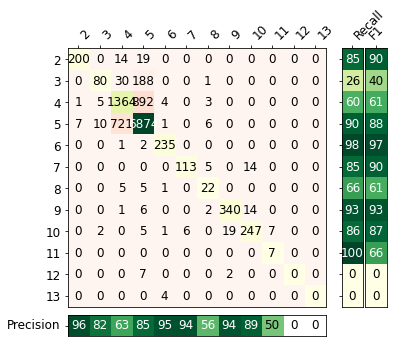

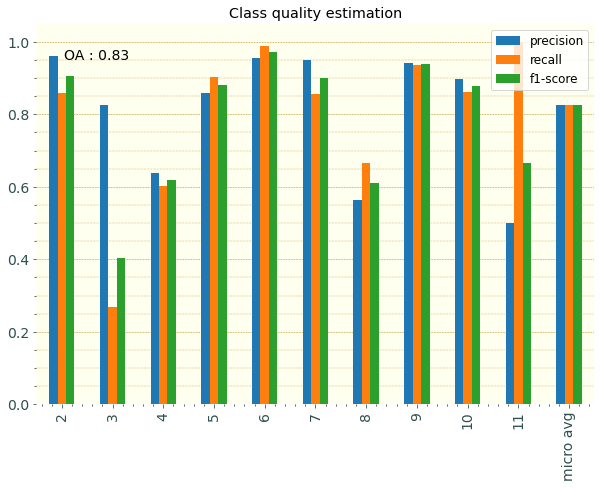

In [1]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')

import os
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, \
    accuracy_score

# personal librairies
import classification as cla
import read_and_write as rw
import plots

# 1 --- define parameters

# inputs
my_folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp'
sample_filename = os.path.join(my_folder, 'sample_eval.tif')
image_filename = os.path.join(my_folder, 'stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif')

# outputs
suffix = '_v2'
out_classif = os.path.join(my_folder, 'ma_classif{}.tif'.format(suffix))
out_matrix = os.path.join(my_folder, 'ma_matrice{}.png'.format(suffix))
out_qualite = os.path.join(my_folder, 'mes_qualites{}.png'.format(suffix))

# Sample parameters
test_size = 0.5



# 2 --- extract samples
X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)


# 3 --- Train
#clf = SVC(cache_size=6000)
clf = tree.DecisionTreeClassifier(max_leaf_nodes=100)
clf.fit(X_train, Y_train)

# 4 --- Test
Y_predict = clf.predict(X_test)

# compute quality
cm = confusion_matrix(Y_test, Y_predict)
report = classification_report(Y_test, Y_predict, labels=np.unique(Y_predict), output_dict=True)
accuracy = accuracy_score(Y_test, Y_predict)

# display and save quality
plots.plot_cm(cm, np.unique(Y_test), out_filename=out_matrix)  ### Warning
plots.plot_class_quality(report, accuracy, out_filename=out_qualite)

# 5 --- apply on the whole image

# load image
X_img, _, t_img = cla.get_samples_from_roi(image_filename, image_filename)

# predict image
Y_img_predict = clf.predict(X_img)

# reshape
ds = rw.open_image(image_filename)
nb_col,nb_row,  _ = rw.get_image_dimension(ds)

#initialization of the array
img = np.zeros((nb_row, nb_col, 1), dtype='uint8')
img[t_img[0], t_img[1], 0] = Y_img_predict

# write image
ds = rw.open_image(image_filename)
rw.write_image(out_classif, img, data_set=ds, gdal_dtype=None,
            transform=None, projection=None, driver_name=None,
            nb_col=None, nb_ligne=None, nb_band=1)

#### Séparation avec répétition

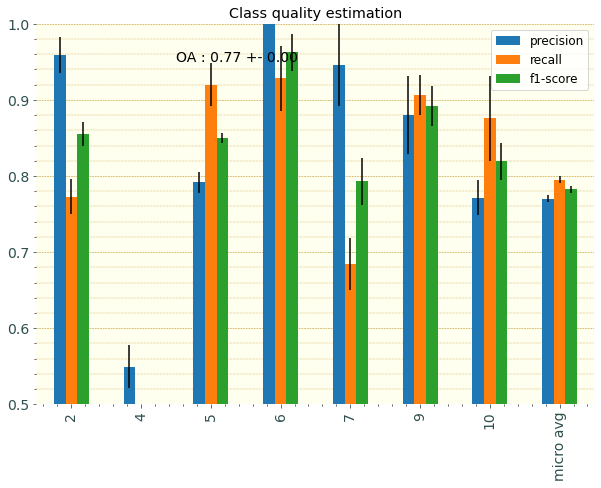

In [10]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')

import os
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, \
    accuracy_score
import geopandas as gpd
import pandas as pd

# personal librairies
import classification as cla
import read_and_write as rw
import plots
import matplotlib.pyplot as plt

# 1 --- define parameters
# inputs
my_folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp'
sample_filename = os.path.join(my_folder, 'sample_eval.tif')
image_filename = os.path.join(my_folder, 'stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif')

# Sample parameters
test_size = 0.5
is_point = False
# if is_point is True
field_name = 'num'

# outputs
suffix = '_v3'
out_classif = os.path.join(my_folder, 'ma_classif{}.tif'.format(suffix))
out_matrix = os.path.join(my_folder, 'ma_matrice{}.png'.format(suffix))
out_qualite = os.path.join(my_folder, 'mes_qualites{}.png'.format(suffix))

# 2 --- extract samples
if not is_point :
    X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)
else :
    # get X
    list_row, list_col = rw.get_row_col_from_file(sample_filename, image_filename)
    image = rw.load_img_as_array(image_filename)
    X = image[(list_row, list_col)]

    # get Y
    gdf = gpd.read_file(sample_filename)
    Y = gdf.loc[:, field_name].values
    Y = np.atleast_2d(Y).T

list_cm = []
list_accuracy = []
list_report = []

for i in range(30):  
    # Split sample
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)


    # 3 --- Train
    #clf = SVC(cache_size=6000)
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)
    clf.fit(X_train, Y_train)

    # 4 --- Test
    Y_predict = clf.predict(X_test)

    # compute quality
    list_cm.append(confusion_matrix(Y_test, Y_predict))
    list_accuracy.append(accuracy_score(Y_test, Y_predict))
    report = classification_report(Y_test, Y_predict,

                                   labels=np.unique(Y_predict), output_dict=True)
    # store them
    list_report.append(report_from_dict_to_df(report))


# compute mean of cm
#array_cm = np.array(list_cm)
#mean_cm = array_cm.mean(axis=0)

# compute mean and std of overall accuracy
array_accuracy = np.array(list_accuracy)
mean_accuracy = array_accuracy.mean()
std_accuracy = array_accuracy.std()

# compute mean and std of classification report
array_report = np.array(list_report)
mean_report = array_report.mean(axis=0)
std_report = array_report.std(axis=0)
a_report = list_report[0]
mean_df_report = pd.DataFrame(mean_report, index=a_report.index,
                              columns=a_report.columns)
std_df_report = pd.DataFrame(std_report, index=a_report.index,
                             columns=a_report.columns)

# Display confusion matrix
#plots.plot_cm(mean_cm, np.unique(Y_test))
#plt.savefig(out_matrix, bbox_inches='tight')


# Display class metrics
fig, ax = plt.subplots(figsize=(10, 7))
ax = mean_df_report.T.plot.bar(ax=ax, yerr=std_df_report.T, zorder=2)
ax.set_ylim(0.5, 1)
_ = ax.text(1.5, 0.95, 'OA : {:.2f} +- {:.2f}'.format(mean_accuracy,
                                                      std_accuracy),
            fontsize=14)
ax.set_title('Class quality estimation')

# custom : cuteness
# background color
ax.set_facecolor('ivory')
# labels
x_label = ax.get_xlabel()
ax.set_xlabel(x_label, fontdict={'fontname': 'Sawasdee'}, fontsize=14)
y_label = ax.get_ylabel()
ax.set_ylabel(y_label, fontdict={'fontname': 'Sawasdee'}, fontsize=14)
# borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis='x', colors='darkslategrey', labelsize=14)
ax.tick_params(axis='y', colors='darkslategrey', labelsize=14)
# grid
ax.minorticks_on()
ax.yaxis.grid(which='major', color='darkgoldenrod', linestyle='--',
              linewidth=0.5, zorder=1)
ax.yaxis.grid(which='minor', color='darkgoldenrod', linestyle='-.',
              linewidth=0.3, zorder=1)
plt.savefig(out_qualite, bbox_inches='tight')

#### Séparation

In [56]:
def report_from_dict_to_df(dict_report):

    # convert report into dataframe
    report_df = pd.DataFrame.from_dict(dict_report)

    # drop unnecessary rows and columns
    #report_df = report_df.drop([ 'accuracy', 'macro avg', 'weighted avg'], axis=1)
    report_df = report_df.drop(['support'], axis=0)

    return report_df

/home/terudel/Documents/code/MuseoToolBox/museotoolbox/charts/__init__.py:189: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(


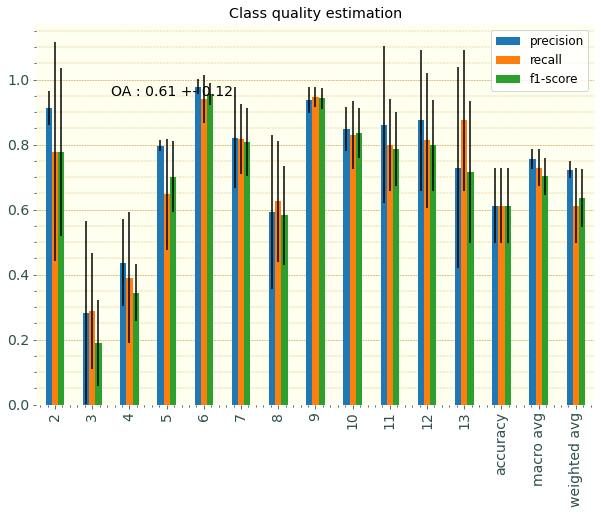

In [80]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')

import os
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, \
    accuracy_score
import geopandas as gpd

# personal librairies
import classification as cla
import read_and_write as rw
import plots

# 1 --- define parameters
# inputs
my_folder = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/evaluation/data/data_temp'
sample_filename = os.path.join(my_folder, 'sample_eval.tif')
image_filename = os.path.join(my_folder, 'stack_Sentinel2_2017_14dates_L93_ndvi_masked.tif')


# Sample parameters
#test_size = 0.7
nb_iter = 4
is_point = False
# if is_point is True
field_name = 'num'

# outputs
suffix = '_v4'
out_classif = os.path.join(my_folder, 'ma_classif{}.tif'.format(suffix))
out_matrix = os.path.join(my_folder, 'ma_matrice{}.png'.format(suffix))
out_qualite = os.path.join(my_folder, 'mes_qualites{}.png'.format(suffix))


# 2 --- extract samples
if not is_point :
    X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)
else :
    # get X
    list_row, list_col = rw.get_row_col_from_file(sample_filename, image_filename)
    image = rw.load_img_as_array(image_filename)
    X = image[(list_row, list_col)]

    # get Y
    gdf = gpd.read_file(sample_filename)
    Y = gdf.loc[:, field_name].values
    Y = np.atleast_2d(Y).T

list_cm = []
list_accuracy = []
list_report = []
list_report_bis = []



# Iter on stratified K fold
kf = StratifiedKFold(n_splits=nb_iter)
for train, test in kf.split(X, Y):
    X_train, X_test = X[train], X[test]
    Y_train, Y_test = Y[train], Y[test]

    # 3 --- Train
    #clf = SVC(cache_size=6000)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, Y_train)

    # 4 --- Test
    Y_predict = clf.predict(X_test)

    # compute quality
    list_cm.append(confusion_matrix(Y_test, Y_predict))
    list_accuracy.append(accuracy_score(Y_test, Y_predict))
    report = classification_report(Y_test, Y_predict,

                                   labels=np.unique(Y_predict), output_dict=True)

    # store them
    list_report.append(report_from_dict_to_df(report))
    list_report_bis.append(report)


# compute mean of cm
array_cm = np.array(list_cm)
mean_cm = array_cm.mean(axis=0)

# compute mean and std of overall accuracy
array_accuracy = np.array(list_accuracy)
mean_accuracy = array_accuracy.mean()
std_accuracy = array_accuracy.std()

# compute mean and std of classification report
array_report = np.array(list_report)
mean_report = array_report.mean(axis=0)
std_report = array_report.std(axis=0)
a_report = list_report[0]
mean_df_report = pd.DataFrame(mean_report, index=a_report.index,
                              columns=a_report.columns)
std_df_report = pd.DataFrame(std_report, index=a_report.index,
                             columns=a_report.columns)

# Display confusion matrix
plots.plot_cm(mean_cm, np.unique(Y_test))
plt.savefig(out_matrix, bbox_inches='tight')

# Display class metrics
fig, ax = plt.subplots(figsize=(10, 7))
ax = mean_df_report.T.plot.bar(ax=ax, yerr=std_df_report.T, zorder=2)
_ = ax.text(1.5, 0.95, 'OA : {:.2f} +- {:.2f}'.format(mean_accuracy,
                                                      std_accuracy),
            fontsize=14)
ax.set_title('Class quality estimation')

# custom : cuteness
# background color
ax.set_facecolor('ivory')
# labels
x_label = ax.get_xlabel()
ax.set_xlabel(x_label, fontdict={'fontname': 'Sawasdee'}, fontsize=14)
y_label = ax.get_ylabel()
ax.set_ylabel(y_label, fontdict={'fontname': 'Sawasdee'}, fontsize=14)
# borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis='x', colors='darkslategrey', labelsize=14)
ax.tick_params(axis='y', colors='darkslategrey', labelsize=14)
# grid
ax.minorticks_on()
ax.yaxis.grid(which='major', color='darkgoldenrod', linestyle='--',
              linewidth=0.5, zorder=1)
ax.yaxis.grid(which='minor', color='darkgoldenrod', linestyle='-.',
              linewidth=0.3, zorder=1)
plt.savefig(out_qualite, bbox_inches='tight')

In [82]:
array_report = np.array(list_report_bis)
std_report = array_report.std(axis=0)

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [70]:
list_wrong

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [12]:
import sys
sys.path.append('/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/python_scripts')
import os
import read_and_write as rw
import numpy as np

In [ ]:
image_filename = '/home/terudel/Documents/cours/2020-2021/SIGMA/teledec_avance/data/pourMarc/S2_2017_selection_images_sansNuages/stack_Sentinel2_2017_14dates_L93.tif'

ds = rw.open_image(image_filename)
img = rw.load_img_as_array(image_filename)